# 量化评估

### 年化收益率

年化收益率是把当前收益率（日收益率、周收益率、月收益率）换算成年收益率来计算的，是一种理论收益率，并不是真正的已取得的收益率。因为年化收益率是变动的，所以年收益率不一定和年化收益率相同。

总收益率：$$R=\frac{P_T-P_t}{P_t}$$
其中，$P_T$是期末卖出时的价格，$P_t$是期初买入时的价格。  

年化收益率：$$R_p=(1+R)^{\frac{m}{n}}-1$$
其中，R是期间总收益率，m是与n（可以是天数、周数、月数）相对应的计算周期，根据计算惯例，m=250、52、12分别指代日、周、月向年化的转换。

### 最大回撤

在选定周期内任一历史时点往后推，产品净值走到最低点时的收益率回撤幅度的最大值。最大回撤用来描述买入产品后可能出现的最糟糕的情况。最大回撤是一个重要的风险指标，对于对冲基金和数量化策略交易，该指标比波动率还重要。
P为某一天的净值，i为某一天，j为i后的某一天，Pi为第i天的产品净值，Pj则是Pi后面某一天的净值
则该基金的最大回撤率计算如下：
$$Max\_drawdown=\frac{max(P_i-P_j)}{P_i}$$
即通过对每一个净值进行回撤率求值，然后找出最大的。

### Beta: 贝塔系数

*相当于业绩评价基准收益的总体波动性
$$beta=\beta_p=\frac{Cov(P_i,P_m)}{Var_m}$$

*衡量策略的系统性风险：
如果Beta为1，策略和市场（参照沪深300指数）同进退
如果Beta为1.1，市场上涨10%时，策略上涨11%；市场下滑10%时，策略下滑11%。
如果Beta为0.9，市场上涨10%时，策略上涨9%；市场下滑10%时，策略下滑9%。
 
那么问题来了, Beta值到底是大好还是小好呢？
这得具体问题具体分析，如果是牛市，股市兴兴向荣，个股、大盘狂涨，那就要选择Beta值大的策略；
如果是熊市，经济下行压力大，就应该选择Beta值小的策略，这样就可以比较好的控制风险，确保资金的安全。

### Alpha：阿尔法系数
*实际收益和按照Beta系数计算的期望收益之间的差额。
*代表策略多大程度上跑赢了预期的收益率

#### beta和alpha的估计
这里的beta和alpha系数都来自资本资产定价模型，先来看看CAPM：
$$E(r_i)=r_f+\beta (E(r_m)-r_f)$$
$E(r_i)$是股票i的预期收益率，$r_f$是无风险利率，$E(r_m)$是市场指数收益率；
$\beta$系数是系统性风险，在评估股市波动风险与投资机会的方法中，常用来衡量结构性与系统性风险，可以简单理解为个股波动相对大盘波动的偏离程度。CAPM的计量模型可以表示为：
$$r_i=\alpha+\beta r_m+\varepsilon$$
$\alpha$可以理解为超额收益率，$\varepsilon$是随机扰动，可以理解为个体风险。

### 夏普比率

*代表投资人每多承担一分风险，可以拿到几分报酬；
   ---单位风险所获得的超额回报率
*该比率越高，策略承担单位风险得到的超额回报率越高。
 所以说夏普比率是越高越好滴..
 
 $$Sharpe\_ratio= \frac{R_p-R_f}{\sigma_p}$$
 其中，$R_p$为年化收益率， $R_f$ 是无风险收益率，$\sigma_p$为年化波动率

### 信息比率
$$Information\_ratio=\frac{R_p-R_m}{\sigma_t} $$
其中，$R_p$为年化收益率， $R_f$ 为基准年化收益率（如沪深300指数），$\sigma_t$为策略与基准每日收益率差值的年化标准差

### Python计算实例
使用tushare获取交易数据，考虑最简单的策略：买入持有！分别计算期间总收益率，年化收益率，最大回撤，beta、alpha系数，夏普比率和信息比率。

In [1]:
#先引入后面可能用到的包（package）
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline   

#正常显示画图时出现的中文和负号
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False

In [2]:
### 获取数据：tushare开源库（确认已安装好：pip install tushare）
import tushare as ts
#起始和结束日期可以自行输入，否则使用默认
def get_data(code,start_date="2009-01-01", end_date="2019-01-18"):
    df = ts.get_k_data(code, start=start_date, end=end_date)
    df.index=pd.to_datetime(df.date)
    return df.close
#返回收盘价

In [3]:
#以上证综指、贵州茅台、工商银行、中国平安为例
stocks={'sh':'上证综指','600519':'贵州茅台',
        '601398':'工商银行','601318':'中国平安'}
#获取上述股票（指数）的每日前复权收盘价
df=pd.DataFrame()
for code,name in stocks.items():
    df[name]=get_data(code)

In [4]:
df.head()

,上证综指,贵州茅台,工商银行,中国平安
date,,,,
2009-01-05,1880.72,68.615,2.178,12.513
2009-01-06,1937.15,68.824,2.239,12.952
2009-01-07,1924.01,67.609,2.190,12.956
2009-01-08,1878.18,68.710,2.142,12.292
2009-01-09,1904.86,67.925,2.166,12.323


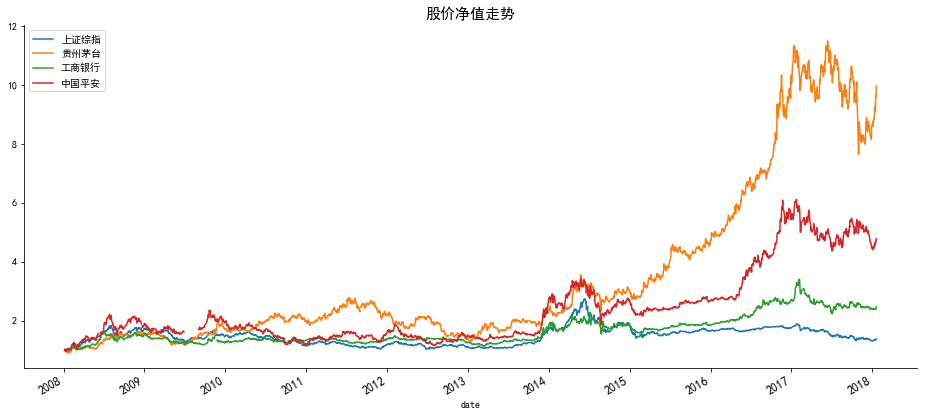

In [5]:
#以第一交易日2009年1月5日收盘价为基点，计算净值
df_new=df/df.iloc[0]
#将上述股票在回测期间内的净值可视化
df_new.plot(figsize=(16,7))
#图标题
plt.title('股价净值走势',fontsize=15)
#设置x轴坐标
my_ticks = pd.date_range('2008-01-01','2019-01-18',freq='Y')
plt.xticks(my_ticks,fontsize=12)
#去掉上、右图的线
ax=plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.show()

### 累计收益率和年化收益率
收益率可以根据上面公式计算，或使用对数收益率，也可以根据上面的累计净值来推出累计收益率（累计净值-1）。

In [64]:
### 区间累计收益率(绝对收益率)
total_ret=df_new.iloc[-1]-1
TR=pd.DataFrame(total_ret.values,columns=['累计收益率'],index=total_ret.index)
TR

,累计收益率
上证综指,0.380328
贵州茅台,8.962982
工商银行,1.474747
中国平安,3.788620


In [68]:
###年化收益率,假设一年以250交易日计算
annual_ret=pow(1+total_ret,250/len(df_new))-1
AR=pd.DataFrame(annual_ret.values,columns=['年化收益率'],index=annual_ret.index)
AR

,年化收益率
上证综指,0.033520
贵州茅台,0.265105
工商银行,0.097122
中国平安,0.173761


### 最大回撤
实际上，numpy和pandas借助库函数均可以实现一行代码计算最大回撤。

In [8]:
#numpy:np.maximum.accumulate计算序列累计最大值
code='上证综指'
n_d=((np.maximum.accumulate(df[code])-df[code])/np.maximum.accumulate(df[code])).max()
#pandas使用cummax（）计算序列累计最大值
p_d=((df[code].cummax()-df[code])/df[code].cummax()).max()
#打印结果
print(f'numpy方法计算结果：{round(n_d*100,2)}%')
print(f'pandas方法计算结果：{round(p_d*100,2)}%')                    

numpy方法计算结果：52.3%
pandas方法计算结果：52.3%


In [71]:
#定义成函数，减少重复工作
def max_drawdown(df):
    md=((df.cummax()-df)/df.cummax()).max()
    return round(md,4)
md={}
for code,name in stocks.items():
    md[name]=max_drawdown(df[name])
#最大回撤率结果：
MD=pd.DataFrame(md,index=['最大回撤']).T
MD

,最大回撤
上证综指,0.5230
贵州茅台,0.5331
工商银行,0.3444
中国平安,0.5070


### alpha和beta 
使用回归来估计alpha和beta的值。

In [10]:
#计算每日收益率
#收盘价缺失值（停牌），使用前值代替
rets=(df.fillna(method='pad')).apply(lambda x:x/x.shift(1)-1)[1:]
rets.head()

,上证综指,贵州茅台,工商银行,中国平安
date,,,,
2009-01-06,0.030004,0.003046,0.028007,0.035084
2009-01-07,-0.006783,-0.017654,-0.021885,0.000309
2009-01-08,-0.023820,0.016285,-0.021918,-0.051250
2009-01-09,0.014205,-0.011425,0.011204,0.002522
2009-01-12,-0.002368,-0.012852,-0.005540,-0.017609


In [11]:
#市场指数为x，个股收益率为y
from scipy import stats
x=rets.iloc[:,0].values
y=rets.iloc[:,1:].values
AB=pd.DataFrame()
alpha=[]
beta=[]
for i in range(3):
#使用scipy库中的stats.linregress线性回归
#python回归有多种实现方式，
#如statsmodels.api的OLS，sklearn库等等
    b,a,r_value,p_value,std_err=stats.linregress(x,y[:,i])
    #alpha转化为年化
    alpha.append(round(a*250,3))
    beta.append(round(b,3))
AB['alpha']=alpha
AB['beta']=beta
AB.index=rets.columns[1:]
#输出结果：
AB

,alpha,beta
贵州茅台,0.246,0.637
工商银行,0.083,0.614
中国平安,0.153,1.071


In [12]:
#使用公式法直接计算beta值（见前文公式）：
beta1=rets[['上证综指','贵州茅台']].cov().iat[0,1]/rets['上证综指'].var()
beta2=rets[['上证综指','工商银行']].cov().iat[0,1]/rets['上证综指'].var()
beta3=rets[['上证综指','中国平安']].cov().iat[0,1]/rets['上证综指'].var()
print(f'贵州茅台beta:{round(beta1,3)}')
print(f'工商银行beta:{round(beta2,3)}')
print(f'中国平安beta:{round(beta3,3)}')

贵州茅台beta:0.637
工商银行beta:0.614
中国平安beta:1.071


In [13]:
#使用公式法直接计算beta值（见前文公式）：
#annual_ret是前文计算出来的年化收益率
alpha1=(annual_ret[1]-annual_ret[0]*beta1)
alpha2=(annual_ret[2]-annual_ret[0]*beta2)
alpha3=(annual_ret[3]-annual_ret[0]*beta3)
print(f'贵州茅台alpha:{round(alpha1,3)}')
print(f'工商银行alpha:{round(alpha2,3)}')
print(f'中国平安alpha:{round(alpha3,3)}')

贵州茅台alpha:0.244
工商银行alpha:0.077
中国平安alpha:0.138


### 夏普比率和信息比率

In [69]:
#超额收益率以无风险收益率为基准
#假设无风险收益率为年化3%
exReturn=rets-0.03/250
#计算夏普比率
sharperatio=np.sqrt(len(exReturn))*exReturn.mean()/exReturn.std()
#夏普比率的输出结果
SHR=pd.DataFrame(sharperatio,columns=['夏普比率'])
SHR

,夏普比率
上证综指,0.398217
贵州茅台,2.547269
工商银行,1.215739
中国平安,1.737360


In [15]:
###信息比率
#超额收益率以指数收益率或其他为基准
#这里以上证综指为基准
ex_return=pd.DataFrame() 
ex_return['贵州茅台']=rets.iloc[:,1]-rets.iloc[:,0]
ex_return['工商银行']=rets.iloc[:,2]-rets.iloc[:,0]
ex_return['中国平安']=rets.iloc[:,3]-rets.iloc[:,0]
ex_return.head()

,贵州茅台,工商银行,中国平安
date,,,
2009-01-06,-0.026958,-0.001997,0.005079
2009-01-07,-0.010871,-0.015102,0.007092
2009-01-08,0.040105,0.001902,-0.027430
2009-01-09,-0.025630,-0.003001,-0.011683
2009-01-12,-0.010485,-0.003173,-0.015242


In [70]:
#计算信息比率
information=np.sqrt(len(ex_return))*ex_return.mean()/ex_return.std()
#信息比率的输出结果
INR=pd.DataFrame(information,columns=['信息比率'])
INR

,信息比率
贵州茅台,2.440970
工商银行,0.931029
中国平安,2.124666


In [76]:
#将上述指标合并成一张表
indicators=pd.concat([TR,AR,MD,AB,SHR,INR],axis=1,join='outer',sort='False')
#结果保留三位小数
indicators.round(3)

,累计收益率,年化收益率,最大回撤,alpha,beta,夏普比率,信息比率
上证综指,0.380,0.034,0.523,NaN,NaN,0.398,NaN
中国平安,3.789,0.174,0.507,0.153,1.071,1.737,2.125
工商银行,1.475,0.097,0.344,0.083,0.614,1.216,0.931
贵州茅台,8.963,0.265,0.533,0.246,0.637,2.547,2.441


In [58]:
def plot_max_drawdown(df,name):
    #累计收益率
    df_new=df/df.iloc[0]
    total_ret=df_new.iloc[-1]-1
    #年化收益率,假设一年以250交易日计算
    annual_ret=pow(1+total_ret,250/len(df_new))-1
    
    #最大回撤
    dd=(df[name].cummax()-df[name])/df[name].cummax()
    # 区间最大回撤对应的索引值
    j=dd.idxmax()
    # 区间最大值对应的索引值
    i =df[name][:j].idxmax()
    #最大回撤比率
    d=dd.max()
    
    #计算beta和alpha
    beta=rets[['上证综指',name]].cov().iat[0,1]/rets['上证综指'].var()
    alpha=(annual_ret[name]-annual_ret[0]*beta)
    
    #夏普比率
    #假设无风险收益率为年化3%
    exReturn=rets-0.03/250
    sharper_atio=np.sqrt(len(exReturn))*exReturn.mean()/exReturn.std()
    
    #信息比率
    ex_return=rets.loc[:,name]-rets.iloc[:,0]
    information_ratio=np.sqrt(len(ex_return))*ex_return.mean()/ex_return.std()
    
    ###绘制图像
    #设置图片显示大小
    plt.figure(figsize=(16,6))
    #对原时间序列画图
    df[name].plot()
    #画出最大回撤的高低点，红色圆圈
    plt.plot(df[name][[i, j]],'o', color="r", markersize=10)
    #添加文本说明
    TR=round(total_ret[name]*100,2)
    AR=round(annual_ret[name]*100,2)
    MD=round(d*100,2)
    A=round(alpha*100,2)
    B=round(beta,2)
    S=round(sharper_atio[name],2)
    I=round(information_ratio,2)
    # xy=(j,df[name][j]),xytext=(i,df[name][i]), 
    plt.annotate(f'累计收益率：{TR}%，年化收益率：{AR}%\n 最大回撤：{MD}% \n alpha:{A}，beta：{B}\n夏普比率：{S}，信息比率：{I}',
          xy=(j,df[name][j]),xytext=(i,df[name][i]), 
          bbox = dict(boxstyle = 'round,pad=0.5',
          fc = 'yellow', alpha = 0.5),
          arrowprops=dict(facecolor='red', 
          shrink=0.05),fontsize=12)
    #添加标题
    plt.title(name+'量化回测指标',fontsize=15)
    #设置X轴标签
    my_ticks = pd.date_range('2008-01-01','2019-01-18',freq='Y')
    plt.xticks(my_ticks,fontsize=12)
    #不显示X轴标题
    plt.xlabel('')
    #将右边 上边的两条边颜色设置为空
    ax=plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    plt.show()

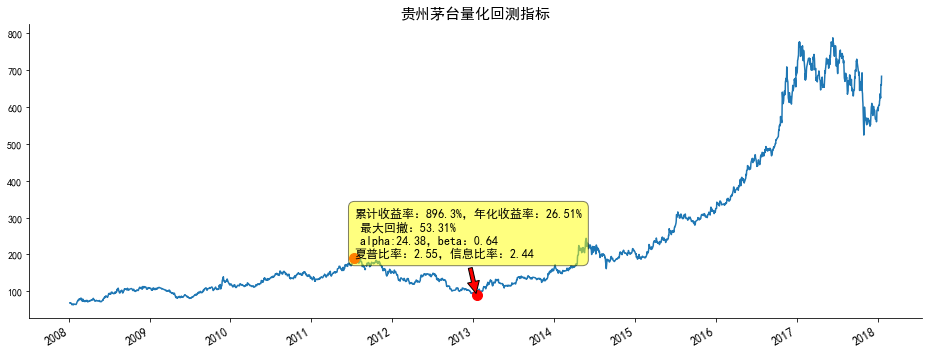

In [59]:
#贵州茅台买入持有策略回测可视化
plot_max_drawdown(df,'贵州茅台')

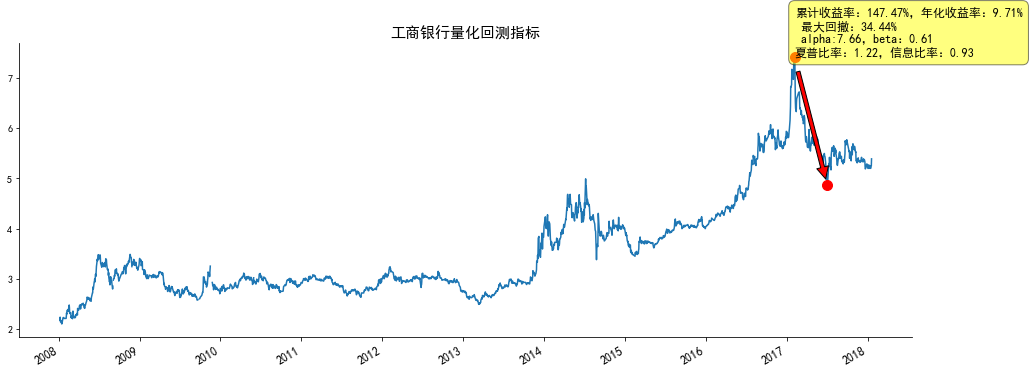

In [47]:
#贵州茅台买入持有策略回测可视化
plot_max_drawdown(df,'工商银行')

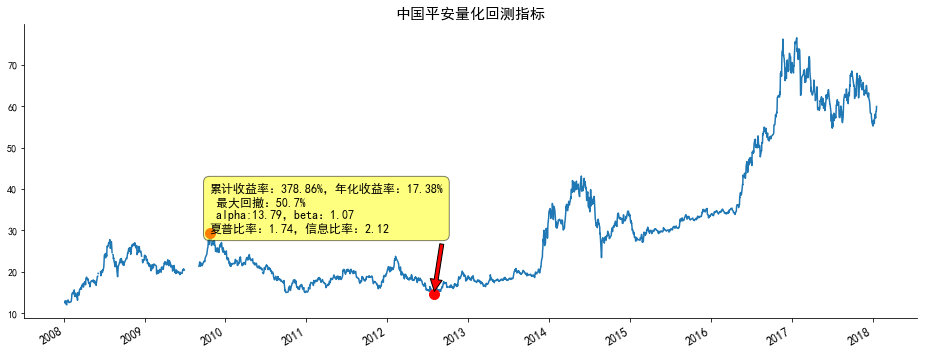

In [331]:
#贵州茅台买入持有策略回测可视化
plot_max_drawdown(df,'中国平安')

推荐几个Python量化回测框架（开源平台）：  
聚宽 （量化回测平台）、优矿（通联量化实验室）、万矿（Wind旗下）  
Zipline - 一个Python的回测框架   
vnpy - 基于python的开源交易平台开发框架  
pyalgotrade - 一个Python的事件驱动回测框架